In [72]:
import pandas as pd
import numpy as np # linear algebra
from keras.utils import to_categorical
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from bs4 import BeautifulSoup
from nltk.corpus import wordnet
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
import re
from tqdm import tqdm
import string
import nltk
import html
import time
from scipy.sparse import hstack
from itertools import product
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
# Classifiers
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report, f1_score,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download("maxent_treebank_pos_tagger")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anilo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anilo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\anilo\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


True

# # Sentiment Analysis on McDonald's Reviews with TF-IDF and Machine Learning Algorithms

In this jupyter notebook, our goal is do sentiment analys on mcdonald review datasets with TF-IDF  and Machine Learning Algorithms.

## Part I: Groundwork with basic TF-IDF and Machine Learning Algorithms

1. **Preprocessing**: Initially, we start with basic preprocessing operations. This involves:
    * Cleaning the text to remove any unnecessary elements.
    * Lemmatization to reduce words to their base or root form.
    
2. **Vectorization**: We transform the preprocessed text into numeric vectors using the Term Frequency-Inverse Document Frequency (TFIDF) vectorization technique.

3. **Machine Learning**: Different machine learning algorithms like RandomForest, Support Vector Machine, and Ridge Classifier are applied on these vectors.

4. **Model Selection**: After evaluating the performance, we choose the best machine learning algorithm based on our criteria.

## Part II: Optimizing the TFIDF Model

1. **GridSearch**: We utilize the gridsearch function to optimize our TFIDF parameters.

2. **Custom GridSearch**: For a more tailored optimization process, we also implement the gridsearch function from scratch, ensuring it suits our specific conditions.

## Part III: Character Analyzer with TFIDF

1. **Switching to Character Analysis**: In the previous parts, we used a word analyzer. Here, we shift to using a character analyzer with TFIDF.

2. **Optimization**: Just like in Part II, we optimize the parameters of the char-analyzer model to achieve better results.

## Part IV: Combining Char and Word Analyzer Models

1. **Combination**: We combine the models from word and char analyzers, harnessing the power of both approaches.

2. **Evaluation**: After the combination, we evaluate the performance to decide on the best vectorization method between word, char, and the combined approach.

## Part V: RandomForest Classifier Optimization

1. **Custom GridSearch**: To achieve the best results from the RandomForest classifier, we use a custom gridsearch method to find the most optimal parameters for our scenario.



In [25]:
def evaluation_metrics(Y_test, preds):
    # Creating a confusion matrix
    cm = confusion_matrix(Y_test, preds)

    # Printing the classification report
    print(classification_report(Y_test, preds))

    # Printing the F1 Score
    print("F1 Score: ", f1_score(Y_test, preds, average='weighted'))
    
    f, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="BuPu")
    plt.title('Confusion Matrix')
    plt.xlabel('Y predict')
    plt.ylabel('Y test')
    plt.show()
    

# Part I

In [26]:
df = pd.read_csv(r'E:\NLP\Datasets\McDonald_s_Reviews.csv',engine='c', encoding='latin-1')

# Preprocess

In [27]:
star_mapping = {
    "1 star": 1, 
    "2 stars": 2, 
    "3 stars": 3, 
    "4 stars": 4, 
    "5 stars": 5,
}

df["rating"] = df["rating"].map(star_mapping)

In [28]:
def map_rating(rating):
    if rating in [1, 2]:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    elif rating in [4, 5]:
        return 'Positive'

df['Sentiment'] = df['rating'].apply(map_rating)
df

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,Sentiment
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1,Negative
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4,Positive
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1,Negative
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5,Positive
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1,Negative
...,...,...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,They treated me very badly.,1,Negative
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,The service is very good,5,Positive
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,To remove hunger is enough,4,Positive
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,"It's good, but lately it has become very expen...",5,Positive


In [29]:
sentiment  = {'Positive': 0,'Neutral': 1,'Negative':2} 

df.Sentiment = [sentiment[item] for item in df.Sentiment] 
df

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,Sentiment
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1,2
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4,0
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1,2
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5,0
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1,2
...,...,...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,They treated me very badly.,1,2
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,The service is very good,5,0
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,To remove hunger is enough,4,0
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,"It's good, but lately it has become very expen...",5,0


# Cleaning with Lemmatization

In [30]:
# Initialize objects
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    """Map POS tag to first character used by WordNetLemmatizer"""
    tag = tag[0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def clean_text(text):
    """
    Clean the text by performing various preprocessing tasks.
    """
    # Decode HTML to general chars 
    text = html.unescape(text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www.\S+', r'<URL>', text)
    
    # Remove encoded new lines
    text = re.sub(r'\n', r' ', text) 
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert to lowercase
    text = text.lower()
    
    # Remove 'x'
    text = text.replace('x', '')
    
    # Remove non-ascii characters
    text = text.encode("ascii", "ignore").decode()
    
    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]
    
    # More granular lemmatization
    words_pos = pos_tag(words)
    text = ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in words_pos])
    
    return text

df['cleaned_review'] = df['review'].apply(clean_text)
df[['cleaned_review','review']]

,cleaned_review,review
0,look like someone spit food normal transaction...,Why does it look like someone spit on my food?...
1,itd mcdonalds far food atmosphere go staff mak...,It'd McDonalds. It is what it is as far as the...
2,make mobile order get speaker check line move ...,Made a mobile order got to the speaker and che...
3,mc crispy chicken sandwich customer service qu...,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...
4,repeat order time drive thru still manage mess...,"I repeat my order 3 times in the drive thru, a..."
...,...,...
33391,treat badly,They treated me very badly.
33392,service good,The service is very good
33393,remove hunger enough,To remove hunger is enough
33394,good lately become epensive,"It's good, but lately it has become very expen..."


In [31]:
X = df[['cleaned_review']]
Y=df[['Sentiment']]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

X_train_norm= X_train['cleaned_review'].tolist()
Y_train = Y_train['Sentiment'].tolist()
X_test_norm= X_test['cleaned_review'].tolist()
Y_test = Y_test['Sentiment'].tolist()


# TF-IDF

**What is TF-ID?**<br>
**TF-IDF** (short for **Term Frequency-Inverse Document Frequency**) is a numerical statistic that reflects the importance of a word within a document and in relation to a collection or corpus. Its value grows with the frequency of the word within the document but diminishes if the word is commonly found across other documents. The metric is a composition of two primary components: **TF** and **IDF**.



- **Term Frequency (TF)**: This metric measures the frequency of a word in a document, represented by the ratio of the word's occurrences to the total number of words in the document.

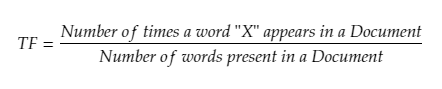

- **Inverse Document Frequency (IDF)**: While every term is deemed equally important when computing TF, certain common terms (like "is", "of", "that") tend to appear frequently but carry lesser significance. The IDF metric serves to down-weight such common terms and amplify the rarer ones.

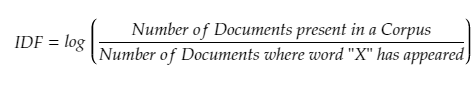

The TF-IDF score is thus computed as:
\begin{equation}
\text{TF-IDF} = \text{TF} \times \text{IDF}
\end{equation}


The resulting score indicates the significance of a word in a document, relative to the entire corpus. Words frequent in a particular document but rare across the corpus receive a high score, denoting their high relevance.

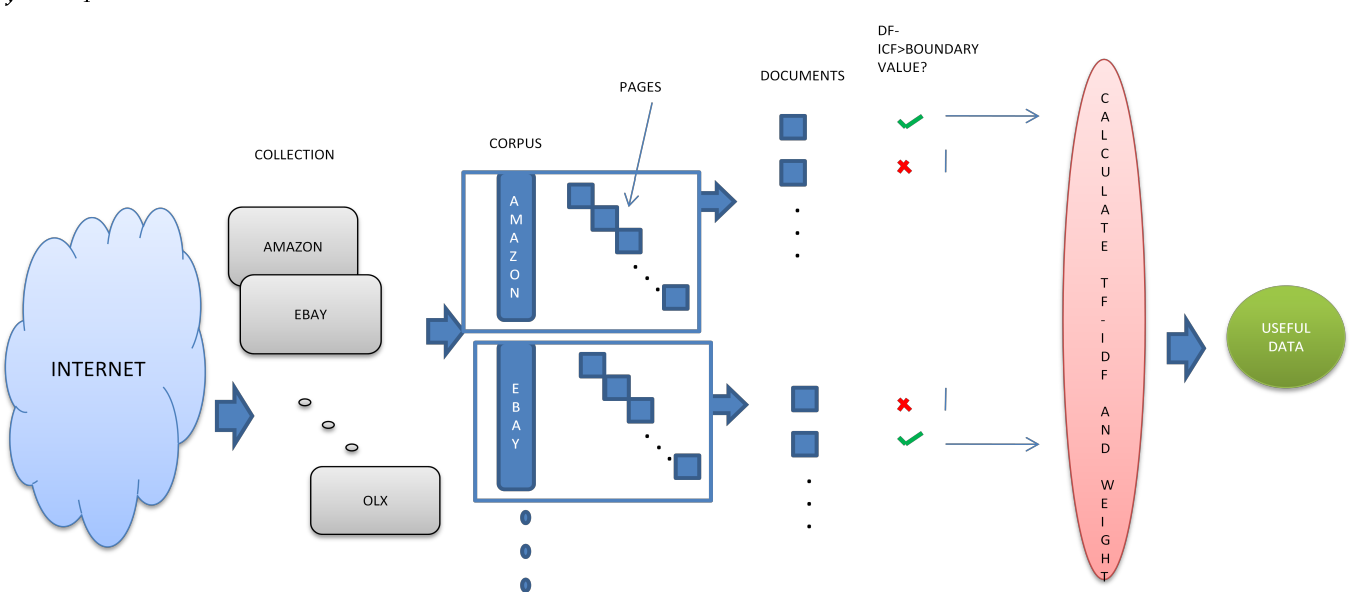

In [71]:
# TF-IDF vectorization
TfidfVec = TfidfVectorizer(ngram_range = (1, 1))
X_train_tfidf = TfidfVec.fit_transform(X_train_norm)
X_test_tfidf = TfidfVec.transform(X_test_norm)

# Random Forest Classifier

**What is Random Forest Classifier ?**<br>
**-** Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.

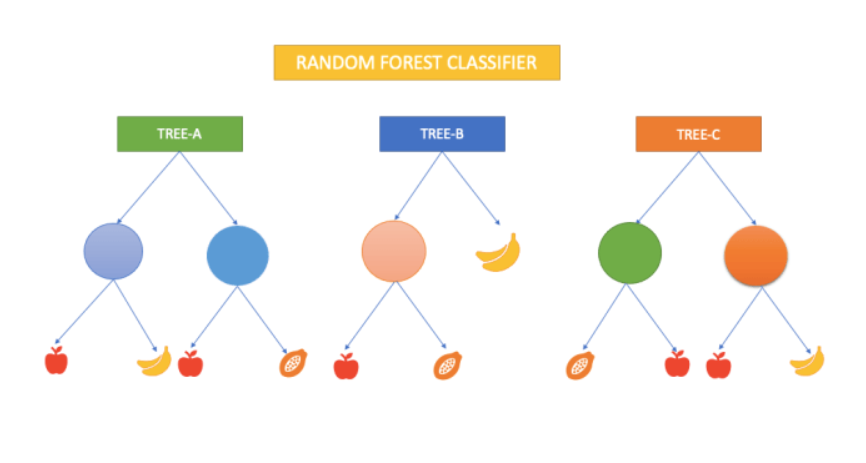

In [73]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_tfidf, Y_train)
Y_pred_test = clf.predict(X_test_tfidf)


              precision    recall  f1-score   support

           0       0.85      0.90      0.88      3198
           1       0.80      0.40      0.53       939
           2       0.82      0.91      0.86      2543

    accuracy                           0.83      6680
   macro avg       0.82      0.74      0.76      6680
weighted avg       0.83      0.83      0.82      6680

F1 Score:  0.822438623539124


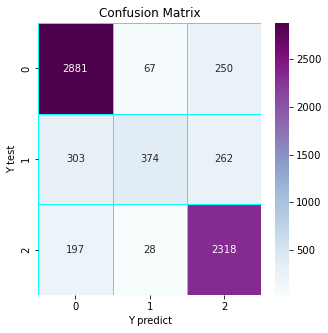

In [74]:
evaluation_metrics(Y_test, Y_pred_test)

# Support Vector Machines (SVM)

**What is Support Vector Machines  ?**<br>
**-** The Support Vector Machine (SVM) is a powerful and flexible supervised machine learning algorithm used for both classification and regression tasks. The SVM is based on the idea of finding a hyperplane that best separates the features into different classes. In a 2-D space, a hyperplane is a line that optimally divides the data points into two different classes.

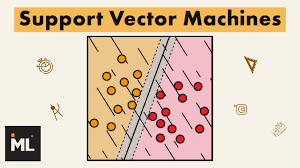

In [75]:
clf = SVC(kernel='linear', C=1, random_state=42)
clf.fit(X_train_tfidf, Y_train)
Y_pred_test = clf.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3198
           1       0.70      0.34      0.46       939
           2       0.81      0.89      0.85      2543

    accuracy                           0.82      6680
   macro avg       0.78      0.71      0.73      6680
weighted avg       0.81      0.82      0.80      6680

F1 Score:  0.8032528711157575


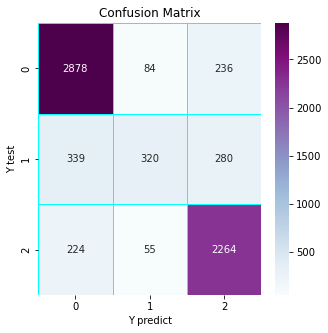

In [76]:
evaluation_metrics(Y_test, Y_pred_test)

# Ridge Classifier

**What is Ridge Classifier  ?**<br>
**-** Ridge Classifier is a variant of Ridge Regression used for classification tasks. It employs L2 regularization to prevent overfitting by penalizing large coefficients. This ensures more stable predictions, particularly when features are highly correlated or outnumber the samples.

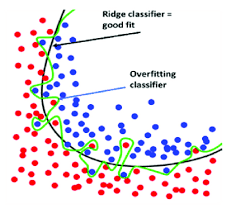

In [77]:
clf = RidgeClassifier(alpha=1.0, random_state=42)
clf.fit(X_train_tfidf, Y_train)
Y_pred_test = clf.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3198
           1       0.72      0.32      0.45       939
           2       0.81      0.89      0.85      2543

    accuracy                           0.82      6680
   macro avg       0.79      0.71      0.72      6680
weighted avg       0.81      0.82      0.80      6680

F1 Score:  0.800673261902962


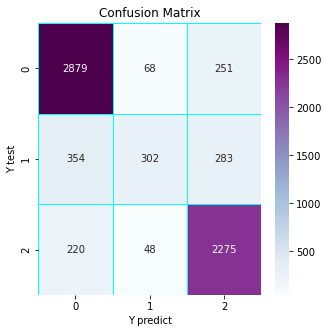

In [78]:
evaluation_metrics(Y_test, Y_pred_test)

**We select the best Machine Learning algorithm with looking accuracy: Random Forest**

# Part II

**We explain parameters of TF-IDF**

#### Optimizing TF-IDF Vectorization

To refine `TfidfVectorizer` for your data, consider tweaking:

1. **ngram_range**: Determines n-grams to extract. `(1, 1)` for unigrams, `(1, 2)` for up to bigrams, etc.
2. **max_df**: Ignores terms that appear in more than a specified percentage of documents. Filters common terms.
3. **min_df**: Considers words that appear in at least a specified number of documents. Helps remove rare terms.
4. **stop_words**: Removes common words. Can be set to 'english' or a custom list.
5. **sublinear_tf**: Uses sublinear scaling on term frequency, converting `tf` to `1 + log(tf)`.
6. **max_features**: Limits the number of features considered in the matrix.
7. **norm**: Specifies norm for normalization. `'l2'` is Euclidean norm; `'l1'` is Manhattan norm.


In [79]:
params = TfidfVec.get_params()
for param, value in params.items():
    print(f"{param}: {value}")

analyzer: word
binary: False
decode_error: strict
dtype: <class 'numpy.float64'>
encoding: utf-8
input: content
lowercase: True
max_df: 1.0
max_features: None
min_df: 1
ngram_range: (1, 1)
norm: l2
preprocessor: None
smooth_idf: True
stop_words: None
strip_accents: None
sublinear_tf: False
token_pattern: (?u)\b\w\w+\b
tokenizer: None
use_idf: True
vocabulary: None


In [38]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Define the parameter grid for optimization
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2),(1, 3)],
    'tfidf__max_df': [0.85, 0.95],
    'tfidf__min_df': [0.01, 0.1],
    'tfidf__stop_words': ['english'],
    'tfidf__sublinear_tf': [True,False],
    'tfidf__max_features': [None, 5000],
    'tfidf__norm': ['l1','l2']
}


# Initialize the grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=4, verbose=3, n_jobs=-1)

# Fit the model with the training data
grid_search.fit(X_train_norm, Y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)


Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters found:  {'tfidf__max_df': 0.85, 'tfidf__max_features': None, 'tfidf__min_df': 0.01, 'tfidf__ngram_range': (1, 1), 'tfidf__norm': 'l2', 'tfidf__stop_words': 'english', 'tfidf__sublinear_tf': False}


In [80]:
# Initialize the TF-IDF vectorizer with the provided parameters
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.85,
    max_features=None,
    min_df=0.01,
    ngram_range=(1, 1),
    norm='l2',
    stop_words='english',
    sublinear_tf=False
)

# Fit the vectorizer to the training data and transform it
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_norm)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test_norm)

In [81]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_tfidf, Y_train)
Y_pred_test = clf.predict(X_test_tfidf)


              precision    recall  f1-score   support

           0       0.80      0.89      0.85      3198
           1       0.78      0.37      0.51       939
           2       0.80      0.84      0.82      2543

    accuracy                           0.80      6680
   macro avg       0.79      0.70      0.72      6680
weighted avg       0.80      0.80      0.79      6680

F1 Score:  0.7893421216219332


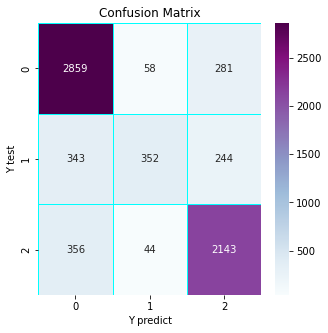

In [82]:
evaluation_metrics(Y_test, Y_pred_test)

In [42]:
# Define the parameter grid
param_grid = {
    'ngram_range': [(1, 1), (1, 2)],
    'max_df': [0.85, 0.95,1.0],
    'min_df': [0.01, 0.1,1],
    'stop_words': [None,'english'],
    'sublinear_tf': [True,False],
    'max_features': [None, 5000],
    'norm': ['l2']
}

# Helper function to create a TfidfVectorizer with given params
def create_vectorizer(params):
    return TfidfVectorizer(
        ngram_range=params['ngram_range'],
        max_df=params['max_df'],
        min_df=params['min_df'],
        stop_words=params['stop_words'],
        sublinear_tf=params['sublinear_tf'],
        max_features=params['max_features'],
        norm=params['norm']
    )

best_accuracy = 0
best_params = None

# Loop through each combination of hyperparameters using ParameterGrid
for params in tqdm(list(ParameterGrid(param_grid))):
    # Create a TfidfVectorizer with the current params
    vectorizer = create_vectorizer(params)
    
    X_train_tfidf = vectorizer.fit_transform(X_train_norm)
    X_test_tfidf = vectorizer.transform(X_test_norm)
    
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_tfidf, Y_train)
    predictions = clf.predict(X_test_tfidf)
    accuracy = f1_score(Y_test, predictions, average='weighted')
    print(accuracy)
    # Update the best accuracy and parameters if current model is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Test Accuracy:", best_accuracy)
print("Best Parameters:", best_params)

  1%|          | 1/144 [00:24<58:50, 24.69s/it]

0.7957491644431883


  1%|▏         | 2/144 [00:49<58:21, 24.66s/it]

0.7944625400465746


  2%|▏         | 3/144 [01:10<54:00, 22.99s/it]

0.7914077384660431


  3%|▎         | 4/144 [01:31<51:58, 22.28s/it]

0.7893421216219332


  3%|▎         | 5/144 [01:56<53:49, 23.23s/it]

0.7961542188767063


  4%|▍         | 6/144 [02:21<54:51, 23.85s/it]

0.7953616021514047


  5%|▍         | 7/144 [02:43<53:06, 23.26s/it]

0.7908833903035761


  6%|▌         | 8/144 [03:05<51:51, 22.88s/it]

0.7901114578449532


  6%|▋         | 9/144 [03:09<37:47, 16.80s/it]

0.5277404917544134


  7%|▋         | 10/144 [03:12<28:11, 12.62s/it]

0.5279579648733373


  8%|▊         | 11/144 [03:14<20:54,  9.44s/it]

0.4995099286205583


  8%|▊         | 12/144 [03:16<15:55,  7.24s/it]

0.4997846164479149


  9%|▉         | 13/144 [03:20<13:28,  6.17s/it]

0.5277404917544134


 10%|▉         | 14/144 [03:24<11:50,  5.47s/it]

0.5279579648733373


 10%|█         | 15/144 [03:26<09:53,  4.60s/it]

0.4995099286205583


 11%|█         | 16/144 [03:29<08:29,  3.98s/it]

0.4997846164479149


 12%|█▏        | 17/144 [04:11<32:55, 15.56s/it]

0.8206899806389331


 12%|█▎        | 18/144 [04:53<49:15, 23.46s/it]

0.822438623539124


 13%|█▎        | 19/144 [05:35<1:00:28, 29.03s/it]

0.8199182136644929


 14%|█▍        | 20/144 [06:16<1:07:33, 32.69s/it]

0.8209197742179989


 15%|█▍        | 21/144 [09:47<2:56:16, 85.99s/it]

0.8205216524198315


 15%|█▌        | 22/144 [13:18<4:11:10, 123.53s/it]

0.8220947186193998


 16%|█▌        | 23/144 [16:40<4:57:01, 147.29s/it]

0.8212161132050961


 17%|█▋        | 24/144 [20:11<5:32:40, 166.34s/it]

0.8225859754698385


 17%|█▋        | 25/144 [20:36<4:05:42, 123.89s/it]

0.7957491644431883


 18%|█▊        | 26/144 [21:01<3:05:22, 94.26s/it] 

0.7944625400465746


 19%|█▉        | 27/144 [21:23<2:21:20, 72.49s/it]

0.7914077384660431


 19%|█▉        | 28/144 [21:45<1:50:54, 57.37s/it]

0.7893421216219332


 20%|██        | 29/144 [22:11<1:31:49, 47.91s/it]

0.7961542188767063


 21%|██        | 30/144 [22:37<1:18:32, 41.34s/it]

0.7953616021514047


 22%|██▏       | 31/144 [23:00<1:07:17, 35.73s/it]

0.7908833903035761


 22%|██▏       | 32/144 [23:22<59:16, 31.75s/it]  

0.7901114578449532


 23%|██▎       | 33/144 [23:25<42:59, 23.24s/it]

0.5277404917544134


 24%|██▎       | 34/144 [23:29<31:39, 17.27s/it]

0.5279579648733373


 24%|██▍       | 35/144 [23:31<23:10, 12.76s/it]

0.4995099286205583


 25%|██▌       | 36/144 [23:33<17:15,  9.59s/it]

0.4997846164479149


 26%|██▌       | 37/144 [23:37<14:05,  7.90s/it]

0.5277404917544134


 26%|██▋       | 38/144 [23:41<11:56,  6.76s/it]

0.5279579648733373


 27%|██▋       | 39/144 [23:44<09:45,  5.57s/it]

0.4995099286205583


 28%|██▊       | 40/144 [23:47<08:12,  4.74s/it]

0.4997846164479149


 28%|██▊       | 41/144 [24:20<22:46, 13.27s/it]

0.8193677234091606


 29%|██▉       | 42/144 [24:53<32:45, 19.27s/it]

0.8204775782038817


 30%|██▉       | 43/144 [25:25<38:56, 23.13s/it]

0.8167051435123401


 31%|███       | 44/144 [25:57<42:40, 25.60s/it]

0.8188197314239515


 31%|███▏      | 45/144 [26:37<49:25, 29.95s/it]

0.818736255287583


 32%|███▏      | 46/144 [27:24<57:26, 35.16s/it]

0.8185987968398353


 33%|███▎      | 47/144 [28:10<1:01:55, 38.31s/it]

0.8168708035287207


 33%|███▎      | 48/144 [28:51<1:02:40, 39.17s/it]

0.817342034030088


 34%|███▍      | 49/144 [29:20<57:07, 36.08s/it]  

0.7957491644431883


 35%|███▍      | 50/144 [29:47<52:32, 33.54s/it]

0.7944625400465746


 35%|███▌      | 51/144 [30:12<47:42, 30.78s/it]

0.7914077384660431


 36%|███▌      | 52/144 [30:37<44:46, 29.20s/it]

0.7893421216219332


 37%|███▋      | 53/144 [31:08<44:58, 29.66s/it]

0.7961542188767063


 38%|███▊      | 54/144 [31:38<44:30, 29.68s/it]

0.7953616021514047


 38%|███▊      | 55/144 [32:03<42:08, 28.41s/it]

0.7908833903035761


 39%|███▉      | 56/144 [32:32<41:48, 28.50s/it]

0.7901114578449532


 40%|███▉      | 57/144 [32:36<30:36, 21.11s/it]

0.5277404917544134


 40%|████      | 58/144 [32:40<22:49, 15.92s/it]

0.5279579648733373


 41%|████      | 59/144 [32:42<16:50, 11.89s/it]

0.4995099286205583


 42%|████▏     | 60/144 [32:44<12:35,  9.00s/it]

0.4997846164479149


 42%|████▏     | 61/144 [32:49<10:29,  7.59s/it]

0.5277404917544134


 43%|████▎     | 62/144 [32:53<09:05,  6.65s/it]

0.5279579648733373


 44%|████▍     | 63/144 [32:56<07:35,  5.62s/it]

0.4995099286205583


 44%|████▍     | 64/144 [32:59<06:25,  4.82s/it]

0.4997846164479149


 45%|████▌     | 65/144 [33:51<25:00, 19.00s/it]

0.8206899806389331


 46%|████▌     | 66/144 [34:40<36:18, 27.92s/it]

0.822438623539124


 47%|████▋     | 67/144 [35:25<42:20, 32.99s/it]

0.8199182136644929


 47%|████▋     | 68/144 [36:13<47:34, 37.56s/it]

0.8209197742179989


 48%|████▊     | 69/144 [40:46<2:15:18, 108.24s/it]

0.8205216524198315


 49%|████▊     | 70/144 [45:19<3:14:27, 157.66s/it]

0.8220947186193998


 49%|████▉     | 71/144 [49:05<3:36:47, 178.19s/it]

0.8212161132050961


 50%|█████     | 72/144 [52:24<3:41:15, 184.38s/it]

0.8225859754698385


 51%|█████     | 73/144 [52:49<2:41:23, 136.39s/it]

0.7957491644431883


 51%|█████▏    | 74/144 [53:13<1:59:51, 102.73s/it]

0.7944625400465746


 52%|█████▏    | 75/144 [53:34<1:29:50, 78.13s/it] 

0.7914077384660431


 53%|█████▎    | 76/144 [53:54<1:09:03, 60.94s/it]

0.7893421216219332


 53%|█████▎    | 77/144 [54:19<55:50, 50.01s/it]  

0.7961542188767063


 54%|█████▍    | 78/144 [54:43<46:35, 42.35s/it]

0.7953616021514047


 55%|█████▍    | 79/144 [55:07<39:38, 36.60s/it]

0.7908833903035761


 56%|█████▌    | 80/144 [55:35<36:34, 34.30s/it]

0.7901114578449532


 56%|█████▋    | 81/144 [55:39<26:25, 25.16s/it]

0.5277404917544134


 57%|█████▋    | 82/144 [55:44<19:32, 18.91s/it]

0.5279579648733373


 58%|█████▊    | 83/144 [55:46<14:09, 13.93s/it]

0.4995099286205583


 58%|█████▊    | 84/144 [55:48<10:27, 10.46s/it]

0.4997846164479149


 59%|█████▉    | 85/144 [55:53<08:36,  8.76s/it]

0.5277404917544134


 60%|█████▉    | 86/144 [55:57<07:08,  7.38s/it]

0.5279579648733373


 60%|██████    | 87/144 [56:00<05:44,  6.04s/it]

0.4995099286205583


 61%|██████    | 88/144 [56:03<04:51,  5.20s/it]

0.4997846164479149


 62%|██████▏   | 89/144 [56:39<13:08, 14.34s/it]

0.8193677234091606


 62%|██████▎   | 90/144 [57:12<17:56, 19.94s/it]

0.8204775782038817


 63%|██████▎   | 91/144 [57:45<21:05, 23.87s/it]

0.8167051435123401


 64%|██████▍   | 92/144 [58:20<23:33, 27.18s/it]

0.8188197314239515


 65%|██████▍   | 93/144 [59:09<28:33, 33.60s/it]

0.818736255287583


 65%|██████▌   | 94/144 [59:56<31:20, 37.62s/it]

0.8185987968398353


 66%|██████▌   | 95/144 [1:00:40<32:17, 39.55s/it]

0.8168708035287207


 67%|██████▋   | 96/144 [1:01:22<32:19, 40.41s/it]

0.817342034030088


 67%|██████▋   | 97/144 [1:01:53<29:20, 37.46s/it]

0.7957491644431883


 68%|██████▊   | 98/144 [1:02:22<26:51, 35.03s/it]

0.7944625400465746


 69%|██████▉   | 99/144 [1:02:46<23:51, 31.81s/it]

0.7914077384660431


 69%|██████▉   | 100/144 [1:03:12<21:55, 29.89s/it]

0.7893421216219332


 70%|███████   | 101/144 [1:03:42<21:32, 30.06s/it]

0.7961542188767063


 71%|███████   | 102/144 [1:04:12<21:04, 30.10s/it]

0.7953616021514047


 72%|███████▏  | 103/144 [1:04:40<20:03, 29.35s/it]

0.7908833903035761


 72%|███████▏  | 104/144 [1:05:07<19:01, 28.53s/it]

0.7901114578449532


 73%|███████▎  | 105/144 [1:05:11<13:45, 21.15s/it]

0.5277404917544134


 74%|███████▎  | 106/144 [1:05:15<10:07, 16.00s/it]

0.5279579648733373


 74%|███████▍  | 107/144 [1:05:17<07:23, 12.00s/it]

0.4995099286205583


 75%|███████▌  | 108/144 [1:05:20<05:28,  9.13s/it]

0.4997846164479149


 76%|███████▌  | 109/144 [1:05:24<04:26,  7.60s/it]

0.5277404917544134


 76%|███████▋  | 110/144 [1:05:28<03:40,  6.48s/it]

0.5279579648733373


 77%|███████▋  | 111/144 [1:05:30<02:57,  5.38s/it]

0.4995099286205583


 78%|███████▊  | 112/144 [1:05:33<02:27,  4.61s/it]

0.4997846164479149


 78%|███████▊  | 113/144 [1:06:26<09:49, 19.01s/it]

0.8206899806389331


 79%|███████▉  | 114/144 [1:07:16<14:15, 28.53s/it]

0.822438623539124


 80%|███████▉  | 115/144 [1:08:07<17:02, 35.25s/it]

0.8199182136644929


 81%|████████  | 116/144 [1:08:56<18:18, 39.22s/it]

0.8209197742179989


 81%|████████▏ | 117/144 [1:13:27<48:56, 108.77s/it]

0.8205216524198315


 82%|████████▏ | 118/144 [1:18:15<1:10:25, 162.52s/it]

0.8220947186193998


 83%|████████▎ | 119/144 [1:22:36<1:20:00, 192.03s/it]

0.8212161132050961


 83%|████████▎ | 120/144 [1:26:23<1:20:59, 202.49s/it]

0.8225859754698385


 84%|████████▍ | 121/144 [1:26:54<57:55, 151.09s/it]  

0.7957491644431883


 85%|████████▍ | 122/144 [1:27:23<42:02, 114.65s/it]

0.7944625400465746


 85%|████████▌ | 123/144 [1:27:48<30:41, 87.71s/it] 

0.7914077384660431


 86%|████████▌ | 124/144 [1:28:12<22:52, 68.62s/it]

0.7893421216219332


 87%|████████▋ | 125/144 [1:28:38<17:41, 55.85s/it]

0.7961542188767063


 88%|████████▊ | 126/144 [1:29:07<14:17, 47.64s/it]

0.7953616021514047


 88%|████████▊ | 127/144 [1:29:33<11:37, 41.03s/it]

0.7908833903035761


 89%|████████▉ | 128/144 [1:29:57<09:34, 35.93s/it]

0.7901114578449532


 90%|████████▉ | 129/144 [1:30:01<06:35, 26.34s/it]

0.5277404917544134


 90%|█████████ | 130/144 [1:30:04<04:34, 19.60s/it]

0.5279579648733373


 91%|█████████ | 131/144 [1:30:07<03:07, 14.42s/it]

0.4995099286205583


 92%|█████████▏| 132/144 [1:30:09<02:09, 10.76s/it]

0.4997846164479149


 92%|█████████▏| 133/144 [1:30:13<01:36,  8.74s/it]

0.5277404917544134


 93%|█████████▎| 134/144 [1:30:17<01:13,  7.39s/it]

0.5279579648733373


 94%|█████████▍| 135/144 [1:30:21<00:56,  6.24s/it]

0.4995099286205583


 94%|█████████▍| 136/144 [1:30:24<00:41,  5.23s/it]

0.4997846164479149


 95%|█████████▌| 137/144 [1:30:57<01:36, 13.73s/it]

0.8193677234091606


 96%|█████████▌| 138/144 [1:31:37<02:09, 21.56s/it]

0.8204775782038817


 97%|█████████▋| 139/144 [1:32:14<02:10, 26.06s/it]

0.8167051435123401


 97%|█████████▋| 140/144 [1:32:46<01:51, 27.84s/it]

0.8188197314239515


 98%|█████████▊| 141/144 [1:33:26<01:35, 31.71s/it]

0.818736255287583


 99%|█████████▊| 142/144 [1:34:09<01:10, 35.11s/it]

0.8185987968398353


 99%|█████████▉| 143/144 [1:34:49<00:36, 36.50s/it]

0.8168708035287207


100%|██████████| 144/144 [1:35:34<00:00, 39.82s/it]

0.817342034030088
Best Test Accuracy: 0.8225859754698385
Best Parameters: {'max_df': 0.85, 'max_features': None, 'min_df': 1, 'ngram_range': (1, 2), 'norm': 'l2', 'stop_words': 'english', 'sublinear_tf': False}


In [96]:
# Initialize the TF-IDF vectorizer with the provided parameters
tfidf_params = {
    'max_df': 0.85,
    'max_features': None,
    'min_df': 1,
    'ngram_range': (1, 2),
    'norm': 'l2',
    'stop_words': 'english',
    'sublinear_tf': False
}
tfidf_vectorizer = TfidfVectorizer(**tfidf_params )
# Fit the vectorizer to the training data and transform it
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_norm)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test_norm)

In [97]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_tfidf, Y_train)
Y_pred_test = clf.predict(X_test_tfidf)


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3198
           1       0.80      0.40      0.53       939
           2       0.83      0.90      0.86      2543

    accuracy                           0.83      6680
   macro avg       0.82      0.74      0.76      6680
weighted avg       0.83      0.83      0.82      6680

F1 Score:  0.8225859754698385


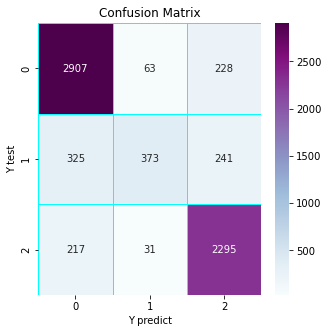

In [98]:
evaluation_metrics(Y_test, Y_pred_test)

#  Part III

**We try different TF-IDF analyzer with char method**

In [93]:
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    norm='l2',
    min_df=0,
    smooth_idf=False,
    max_features=50000)
X_train_tfidf = char_vectorizer.fit_transform(X_train_norm)

# Transform the test data
X_test_tfidf = char_vectorizer.transform(X_test_norm)

In [94]:
params = char_vectorizer.get_params()
for param, value in params.items():
    print(f"{param}: {value}")

analyzer: char
binary: False
decode_error: strict
dtype: <class 'numpy.float64'>
encoding: utf-8
input: content
lowercase: True
max_df: 1.0
max_features: 50000
min_df: 0
ngram_range: (2, 6)
norm: l2
preprocessor: None
smooth_idf: False
stop_words: english
strip_accents: unicode
sublinear_tf: True
token_pattern: (?u)\b\w\w+\b
tokenizer: None
use_idf: True
vocabulary: None


In [95]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_tfidf, Y_train)
Y_pred_test = clf.predict(X_test_tfidf)


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3198
           1       0.82      0.39      0.52       939
           2       0.82      0.90      0.86      2543

    accuracy                           0.83      6680
   macro avg       0.83      0.73      0.75      6680
weighted avg       0.83      0.83      0.82      6680

F1 Score:  0.816336482916255


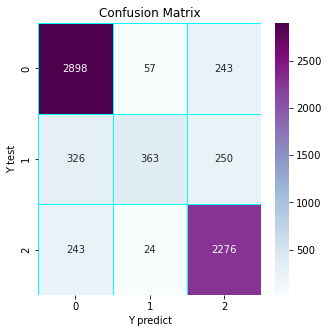

In [96]:
evaluation_metrics(Y_test, Y_pred_test)

In [79]:
# Define the parameter grid
param_grid = {
    'sublinear_tf': [True, False],
    'strip_accents': ['unicode'],
    'stop_words': ['english'],
    'ngram_range': [(2, 5), (2, 6), (2, 7)],
    'norm': ['l2'],
    'min_df': [0, 0.05],
    'smooth_idf': [True,False],
    'max_features': [None,50000],
    'max_df': [0.85,1.0]
}

# Helper function to create a TfidfVectorizer with given params
def create_vectorizer(params):
    return TfidfVectorizer(
        ngram_range=params['ngram_range'],
        min_df=params['min_df'],
        max_df=params['max_df'],
        stop_words=params['stop_words'],
        sublinear_tf=params['sublinear_tf'],
        max_features=params['max_features'],
        norm=params['norm'],
        strip_accents=params['strip_accents'],
        smooth_idf=params['smooth_idf'],
        analyzer='char'
    )
best_accuracy = 0
best_params = None

# Loop through each combination of hyperparameters using ParameterGrid
for params in tqdm(list(ParameterGrid(param_grid))):
    # Create a TfidfVectorizer with the current params
    vectorizer = create_vectorizer(params)
    
    X_train_tfidf = vectorizer.fit_transform(X_train_norm)
    X_test_tfidf = vectorizer.transform(X_test_norm)
    
    clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    clf.fit(X_train_tfidf, Y_train)
    predictions = clf.predict(X_test_tfidf)
    accuracy = f1_score(Y_test, predictions, average='weighted')
    print(params)
    print(accuracy)
    # Update the best accuracy and parameters if current model is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

print("Best Test Accuracy:", best_accuracy)
print("Best Parameters:", best_params)

  1%|          | 1/96 [01:37<2:34:35, 97.64s/it]

{'max_df': 0.85, 'max_features': None, 'min_df': 0, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.8138760588087048


  2%|▏         | 2/96 [03:21<2:39:05, 101.55s/it]

{'max_df': 0.85, 'max_features': None, 'min_df': 0, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8120184164195913


  3%|▎         | 3/96 [05:04<2:37:55, 101.89s/it]

{'max_df': 0.85, 'max_features': None, 'min_df': 0, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.8134499478489507


  4%|▍         | 4/96 [06:44<2:35:14, 101.24s/it]

{'max_df': 0.85, 'max_features': None, 'min_df': 0, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8123081411340276


  5%|▌         | 5/96 [10:29<3:41:16, 145.90s/it]

{'max_df': 0.85, 'max_features': None, 'min_df': 0, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.8151686052459348


  6%|▋         | 6/96 [14:31<4:27:44, 178.49s/it]

{'max_df': 0.85, 'max_features': None, 'min_df': 0, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8110985249320828


  7%|▋         | 7/96 [18:16<4:47:28, 193.81s/it]

{'max_df': 0.85, 'max_features': None, 'min_df': 0, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.811656648935708


  8%|▊         | 8/96 [21:56<4:56:12, 201.96s/it]

{'max_df': 0.85, 'max_features': None, 'min_df': 0, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8132938234761091


  9%|▉         | 9/96 [29:09<6:37:36, 274.21s/it]

{'max_df': 0.85, 'max_features': None, 'min_df': 0, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.8128344361200325


 10%|█         | 10/96 [36:24<7:44:13, 323.87s/it]

{'max_df': 0.85, 'max_features': None, 'min_df': 0, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.811744452742453


 11%|█▏        | 11/96 [44:10<8:40:37, 367.50s/it]

{'max_df': 0.85, 'max_features': None, 'min_df': 0, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.8111284507030421


 12%|█▎        | 12/96 [52:54<9:40:55, 414.95s/it]

{'max_df': 0.85, 'max_features': None, 'min_df': 0, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8127987195181847


 14%|█▎        | 13/96 [53:30<6:55:16, 300.20s/it]

{'max_df': 0.85, 'max_features': None, 'min_df': 0.05, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.7982110034850687


 15%|█▍        | 14/96 [54:06<5:01:17, 220.46s/it]

{'max_df': 0.85, 'max_features': None, 'min_df': 0.05, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.7992927959331886


 16%|█▌        | 15/96 [54:37<3:40:30, 163.34s/it]

{'max_df': 0.85, 'max_features': None, 'min_df': 0.05, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.7976399281055229


 17%|█▋        | 16/96 [55:11<2:45:54, 124.43s/it]

{'max_df': 0.85, 'max_features': None, 'min_df': 0.05, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8002156005253369


 18%|█▊        | 17/96 [55:48<2:09:14, 98.15s/it] 

{'max_df': 0.85, 'max_features': None, 'min_df': 0.05, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.7995978714256216


 19%|█▉        | 18/96 [56:26<1:44:16, 80.21s/it]

{'max_df': 0.85, 'max_features': None, 'min_df': 0.05, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8001318499912248


 20%|█▉        | 19/96 [57:02<1:25:34, 66.68s/it]

{'max_df': 0.85, 'max_features': None, 'min_df': 0.05, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.7997422884738778


 21%|██        | 20/96 [57:34<1:11:15, 56.25s/it]

{'max_df': 0.85, 'max_features': None, 'min_df': 0.05, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8016250407932572


 22%|██▏       | 21/96 [58:08<1:02:13, 49.77s/it]

{'max_df': 0.85, 'max_features': None, 'min_df': 0.05, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.7978624420445607


 23%|██▎       | 22/96 [58:43<55:55, 45.35s/it]  

{'max_df': 0.85, 'max_features': None, 'min_df': 0.05, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8001024015725046


 24%|██▍       | 23/96 [59:17<51:03, 41.97s/it]

{'max_df': 0.85, 'max_features': None, 'min_df': 0.05, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.7989701996953246


 25%|██▌       | 24/96 [59:53<48:05, 40.07s/it]

{'max_df': 0.85, 'max_features': None, 'min_df': 0.05, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.797066575902848


 26%|██▌       | 25/96 [1:01:13<1:01:28, 51.95s/it]

{'max_df': 0.85, 'max_features': 50000, 'min_df': 0, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.8138550922255351


 27%|██▋       | 26/96 [1:02:28<1:08:47, 58.97s/it]

{'max_df': 0.85, 'max_features': 50000, 'min_df': 0, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8165765352704345


 28%|██▊       | 27/96 [1:03:52<1:16:27, 66.49s/it]

{'max_df': 0.85, 'max_features': 50000, 'min_df': 0, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.8156681105383907


 29%|██▉       | 28/96 [1:05:09<1:18:59, 69.70s/it]

{'max_df': 0.85, 'max_features': 50000, 'min_df': 0, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.812865487614011


 30%|███       | 29/96 [1:06:41<1:25:10, 76.28s/it]

{'max_df': 0.85, 'max_features': 50000, 'min_df': 0, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.8166389964126023


 31%|███▏      | 30/96 [1:08:22<1:32:10, 83.79s/it]

{'max_df': 0.85, 'max_features': 50000, 'min_df': 0, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.813793392984204


 32%|███▏      | 31/96 [1:10:01<1:35:35, 88.24s/it]

{'max_df': 0.85, 'max_features': 50000, 'min_df': 0, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.816336482916255


 33%|███▎      | 32/96 [1:11:39<1:37:09, 91.09s/it]

{'max_df': 0.85, 'max_features': 50000, 'min_df': 0, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8143410615483284


 34%|███▍      | 33/96 [1:13:32<1:42:46, 97.87s/it]

{'max_df': 0.85, 'max_features': 50000, 'min_df': 0, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.8142943724874944


 35%|███▌      | 34/96 [1:15:14<1:42:18, 99.01s/it]

{'max_df': 0.85, 'max_features': 50000, 'min_df': 0, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8161811120009158


 36%|███▋      | 35/96 [1:17:07<1:45:02, 103.32s/it]

{'max_df': 0.85, 'max_features': 50000, 'min_df': 0, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.8146398451213073


 38%|███▊      | 36/96 [1:18:55<1:44:38, 104.65s/it]

{'max_df': 0.85, 'max_features': 50000, 'min_df': 0, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.814577505336743


 39%|███▊      | 37/96 [1:19:32<1:22:57, 84.37s/it] 

{'max_df': 0.85, 'max_features': 50000, 'min_df': 0.05, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.7982110034850687


 40%|███▉      | 38/96 [1:20:09<1:07:44, 70.09s/it]

{'max_df': 0.85, 'max_features': 50000, 'min_df': 0.05, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.7992927959331886


 41%|████      | 39/96 [1:20:42<56:07, 59.07s/it]  

{'max_df': 0.85, 'max_features': 50000, 'min_df': 0.05, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.7976399281055229


 42%|████▏     | 40/96 [1:21:18<48:28, 51.94s/it]

{'max_df': 0.85, 'max_features': 50000, 'min_df': 0.05, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8002156005253369


 43%|████▎     | 41/96 [1:22:00<44:57, 49.04s/it]

{'max_df': 0.85, 'max_features': 50000, 'min_df': 0.05, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.7995978714256216


 44%|████▍     | 42/96 [1:22:36<40:39, 45.18s/it]

{'max_df': 0.85, 'max_features': 50000, 'min_df': 0.05, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8001318499912248


 45%|████▍     | 43/96 [1:23:12<37:24, 42.35s/it]

{'max_df': 0.85, 'max_features': 50000, 'min_df': 0.05, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.7997422884738778


 46%|████▌     | 44/96 [1:23:47<34:54, 40.29s/it]

{'max_df': 0.85, 'max_features': 50000, 'min_df': 0.05, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8016250407932572


 47%|████▋     | 45/96 [1:24:23<32:59, 38.82s/it]

{'max_df': 0.85, 'max_features': 50000, 'min_df': 0.05, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.7978624420445607


 48%|████▊     | 46/96 [1:24:59<31:46, 38.12s/it]

{'max_df': 0.85, 'max_features': 50000, 'min_df': 0.05, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8001024015725046


 49%|████▉     | 47/96 [1:25:35<30:33, 37.41s/it]

{'max_df': 0.85, 'max_features': 50000, 'min_df': 0.05, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.7989701996953246


 50%|█████     | 48/96 [1:26:12<29:48, 37.26s/it]

{'max_df': 0.85, 'max_features': 50000, 'min_df': 0.05, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.797066575902848


 51%|█████     | 49/96 [1:28:01<46:10, 58.94s/it]

{'max_df': 1.0, 'max_features': None, 'min_df': 0, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.8138760588087048


 52%|█████▏    | 50/96 [1:29:40<54:20, 70.88s/it]

{'max_df': 1.0, 'max_features': None, 'min_df': 0, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8120184164195913


 53%|█████▎    | 51/96 [1:31:18<59:16, 79.04s/it]

{'max_df': 1.0, 'max_features': None, 'min_df': 0, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.8134499478489507


 54%|█████▍    | 52/96 [1:32:57<1:02:25, 85.12s/it]

{'max_df': 1.0, 'max_features': None, 'min_df': 0, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8123081411340276


 55%|█████▌    | 53/96 [1:36:36<1:29:39, 125.10s/it]

{'max_df': 1.0, 'max_features': None, 'min_df': 0, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.8151686052459348


 56%|█████▋    | 54/96 [1:40:17<1:47:39, 153.81s/it]

{'max_df': 1.0, 'max_features': None, 'min_df': 0, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8110985249320828


 57%|█████▋    | 55/96 [1:43:55<1:58:17, 173.12s/it]

{'max_df': 1.0, 'max_features': None, 'min_df': 0, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.811656648935708


 58%|█████▊    | 56/96 [1:47:34<2:04:40, 187.00s/it]

{'max_df': 1.0, 'max_features': None, 'min_df': 0, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8132938234761091


 59%|█████▉    | 57/96 [1:55:12<2:54:25, 268.36s/it]

{'max_df': 1.0, 'max_features': None, 'min_df': 0, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.8128344361200325


 60%|██████    | 58/96 [2:03:38<3:35:05, 339.63s/it]

{'max_df': 1.0, 'max_features': None, 'min_df': 0, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.811744452742453


 61%|██████▏   | 59/96 [2:12:47<4:08:08, 402.39s/it]

{'max_df': 1.0, 'max_features': None, 'min_df': 0, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.8111284507030421


 62%|██████▎   | 60/96 [2:20:44<4:14:46, 424.63s/it]

{'max_df': 1.0, 'max_features': None, 'min_df': 0, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8127987195181847


 64%|██████▎   | 61/96 [2:21:14<2:58:43, 306.38s/it]

{'max_df': 1.0, 'max_features': None, 'min_df': 0.05, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.7982110034850687


 65%|██████▍   | 62/96 [2:21:44<2:06:40, 223.55s/it]

{'max_df': 1.0, 'max_features': None, 'min_df': 0.05, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.7992927959331886


 66%|██████▌   | 63/96 [2:22:13<1:30:50, 165.15s/it]

{'max_df': 1.0, 'max_features': None, 'min_df': 0.05, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.7976399281055229


 67%|██████▋   | 64/96 [2:22:43<1:06:20, 124.40s/it]

{'max_df': 1.0, 'max_features': None, 'min_df': 0.05, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8002156005253369


 68%|██████▊   | 65/96 [2:23:14<49:53, 96.57s/it]   

{'max_df': 1.0, 'max_features': None, 'min_df': 0.05, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.7995978714256216


 69%|██████▉   | 66/96 [2:23:46<38:34, 77.14s/it]

{'max_df': 1.0, 'max_features': None, 'min_df': 0.05, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8001318499912248


 70%|██████▉   | 67/96 [2:24:18<30:40, 63.46s/it]

{'max_df': 1.0, 'max_features': None, 'min_df': 0.05, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.7997422884738778


 71%|███████   | 68/96 [2:24:49<25:10, 53.96s/it]

{'max_df': 1.0, 'max_features': None, 'min_df': 0.05, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8016250407932572


 72%|███████▏  | 69/96 [2:25:24<21:37, 48.04s/it]

{'max_df': 1.0, 'max_features': None, 'min_df': 0.05, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.7978624420445607


 73%|███████▎  | 70/96 [2:25:59<19:09, 44.21s/it]

{'max_df': 1.0, 'max_features': None, 'min_df': 0.05, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8001024015725046


 74%|███████▍  | 71/96 [2:26:33<17:13, 41.35s/it]

{'max_df': 1.0, 'max_features': None, 'min_df': 0.05, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.7989701996953246


 75%|███████▌  | 72/96 [2:27:09<15:52, 39.69s/it]

{'max_df': 1.0, 'max_features': None, 'min_df': 0.05, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.797066575902848


 76%|███████▌  | 73/96 [2:28:34<20:26, 53.32s/it]

{'max_df': 1.0, 'max_features': 50000, 'min_df': 0, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.8138550922255351


 77%|███████▋  | 74/96 [2:30:05<23:36, 64.36s/it]

{'max_df': 1.0, 'max_features': 50000, 'min_df': 0, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8165765352704345


 78%|███████▊  | 75/96 [2:31:29<24:39, 70.45s/it]

{'max_df': 1.0, 'max_features': 50000, 'min_df': 0, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.8156681105383907


 79%|███████▉  | 76/96 [2:32:48<24:20, 73.03s/it]

{'max_df': 1.0, 'max_features': 50000, 'min_df': 0, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.812865487614011


 80%|████████  | 77/96 [2:34:11<24:03, 75.98s/it]

{'max_df': 1.0, 'max_features': 50000, 'min_df': 0, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.8166389964126023


 81%|████████▏ | 78/96 [2:35:33<23:20, 77.82s/it]

{'max_df': 1.0, 'max_features': 50000, 'min_df': 0, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.813793392984204


 82%|████████▏ | 79/96 [2:36:56<22:28, 79.30s/it]

{'max_df': 1.0, 'max_features': 50000, 'min_df': 0, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.816336482916255


 83%|████████▎ | 80/96 [2:38:22<21:39, 81.23s/it]

{'max_df': 1.0, 'max_features': 50000, 'min_df': 0, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8143410615483284


 84%|████████▍ | 81/96 [2:40:10<22:20, 89.37s/it]

{'max_df': 1.0, 'max_features': 50000, 'min_df': 0, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.8142943724874944


 85%|████████▌ | 82/96 [2:41:42<21:03, 90.26s/it]

{'max_df': 1.0, 'max_features': 50000, 'min_df': 0, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8161811120009158


 86%|████████▋ | 83/96 [2:43:14<19:38, 90.66s/it]

{'max_df': 1.0, 'max_features': 50000, 'min_df': 0, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.8146398451213073


 88%|████████▊ | 84/96 [2:44:46<18:13, 91.13s/it]

{'max_df': 1.0, 'max_features': 50000, 'min_df': 0, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.814577505336743


 89%|████████▊ | 85/96 [2:45:16<13:19, 72.70s/it]

{'max_df': 1.0, 'max_features': 50000, 'min_df': 0.05, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.7982110034850687


 90%|████████▉ | 86/96 [2:45:45<09:57, 59.73s/it]

{'max_df': 1.0, 'max_features': 50000, 'min_df': 0.05, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.7992927959331886


 91%|█████████ | 87/96 [2:46:15<07:36, 50.69s/it]

{'max_df': 1.0, 'max_features': 50000, 'min_df': 0.05, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.7976399281055229


 92%|█████████▏| 88/96 [2:46:44<05:54, 44.26s/it]

{'max_df': 1.0, 'max_features': 50000, 'min_df': 0.05, 'ngram_range': (2, 5), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8002156005253369


 93%|█████████▎| 89/96 [2:47:17<04:45, 40.76s/it]

{'max_df': 1.0, 'max_features': 50000, 'min_df': 0.05, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.7995978714256216


 94%|█████████▍| 90/96 [2:47:54<03:57, 39.53s/it]

{'max_df': 1.0, 'max_features': 50000, 'min_df': 0.05, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8001318499912248


 95%|█████████▍| 91/96 [2:48:30<03:12, 38.50s/it]

{'max_df': 1.0, 'max_features': 50000, 'min_df': 0.05, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.7997422884738778


 96%|█████████▌| 92/96 [2:49:04<02:29, 37.35s/it]

{'max_df': 1.0, 'max_features': 50000, 'min_df': 0.05, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8016250407932572


 97%|█████████▋| 93/96 [2:49:49<01:58, 39.51s/it]

{'max_df': 1.0, 'max_features': 50000, 'min_df': 0.05, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.7978624420445607


 98%|█████████▊| 94/96 [2:50:29<01:19, 39.66s/it]

{'max_df': 1.0, 'max_features': 50000, 'min_df': 0.05, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.8001024015725046


 99%|█████████▉| 95/96 [2:51:06<00:39, 39.04s/it]

{'max_df': 1.0, 'max_features': 50000, 'min_df': 0.05, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}
0.7989701996953246


100%|██████████| 96/96 [2:51:44<00:00, 107.33s/it]

{'max_df': 1.0, 'max_features': 50000, 'min_df': 0.05, 'ngram_range': (2, 7), 'norm': 'l2', 'smooth_idf': False, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': False}
0.797066575902848


Best Test Accuracy: 0.8166389964126023
Best Parameters: {'max_df': 0.85, 'max_features': 50000, 'min_df': 0, 'ngram_range': (2, 6), 'norm': 'l2', 'smooth_idf': True, 'stop_words': 'english', 'strip_accents': 'unicode', 'sublinear_tf': True}


In [99]:
# Given parameters
params = {
    'max_df': 0.85,
    'max_features': 50000,
    'min_df': 0,
    'ngram_range': (2, 6),
    'norm': 'l2',
    'smooth_idf': True,
    'stop_words': 'english',
    'strip_accents': 'unicode',
    'sublinear_tf': True,
    'analyzer': 'char'
}

# Create the vectorizer
tfidf_vectorizer = TfidfVectorizer(**params)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_norm)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test_norm)

In [100]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_tfidf, Y_train)
Y_pred_test = clf.predict(X_test_tfidf)


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3198
           1       0.83      0.39      0.53       939
           2       0.82      0.89      0.86      2543

    accuracy                           0.83      6680
   macro avg       0.83      0.73      0.75      6680
weighted avg       0.83      0.83      0.82      6680

F1 Score:  0.8166389964126023


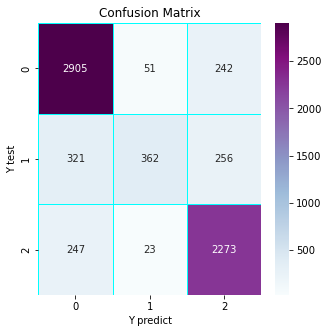

In [101]:
evaluation_metrics(Y_test, Y_pred_test)

# Part IV

**We combine Word and Char analyzer methods ford TF-IDF**

In [104]:
# Given parameters
params = {
    'max_df': 0.85,
    'max_features': 50000,
    'min_df': 0,
    'ngram_range': (2, 6),
    'norm': 'l2',
    'smooth_idf': True,
    'stop_words': 'english',
    'strip_accents': 'unicode',
    'sublinear_tf': True,
    'analyzer': 'char'
}

# Create the vectorizer
tfidf_vectorizer = TfidfVectorizer(**params)
X_train_char = tfidf_vectorizer.fit_transform(X_train_norm)

# Transform the test data
X_test_char = tfidf_vectorizer.transform(X_test_norm)

In [105]:
# Initialize the TF-IDF vectorizer with the provided parameters
tfidf_params = {
    'max_df': 0.85,
    'max_features': None,
    'min_df': 1,
    'ngram_range': (1, 2),
    'norm': 'l2',
    'stop_words': 'english',
    'sublinear_tf': False
}
tfidf_vectorizer = TfidfVectorizer(**tfidf_params )
# Fit the vectorizer to the training data and transform it
X_train_word = tfidf_vectorizer.fit_transform(X_train_norm)

# Transform the test data
X_test_word = tfidf_vectorizer.transform(X_test_norm)

In [107]:
train_features = hstack([X_train_char, X_train_word])

test_features = hstack([X_test_char, X_test_word])

In [108]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(train_features, Y_train)
Y_pred_test = clf.predict(test_features)


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3198
           1       0.83      0.38      0.52       939
           2       0.81      0.90      0.85      2543

    accuracy                           0.83      6680
   macro avg       0.83      0.73      0.75      6680
weighted avg       0.83      0.83      0.81      6680

F1 Score:  0.8135220534383669


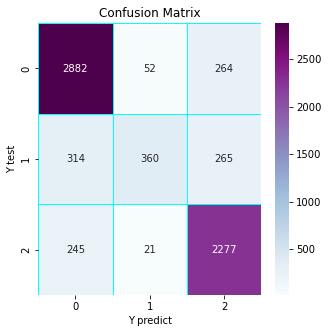

In [109]:
evaluation_metrics(Y_test, Y_pred_test)

**We select the only Word analyzer TF-IDF method. We catch high F1 score in this situation**

# Part V

**We explain parameters of Randomforest**

#### Parameters of RandomForestClassifier

1. **n_estimators**: Number of trees in the forest. More trees can lead to better performance but might slow training.
2. **max_depth**: Max depth of trees. `None` means unlimited until leaves are pure or smaller than `min_samples_split`. Affects overfitting.
3. **min_samples_leaf**: Min samples for a leaf node. A smaller leaf might capture noise in data.
4. **min_samples_split**: Min samples to split a node. Larger values can prevent overfitting.
5. **max_features**: Number of features for the best split. `'auto'` is same as `'sqrt'`, implying `sqrt(n_features)`.
6. **random_state**: Seed for random number generator. Ensures consistent results.
7. **bootstrap**: Use bootstrapping for trees? Default is `True`, for sampling with replacement.
8. **oob_score**: Use out-of-bag samples for a score? Only if `bootstrap=True`.
9. **class_weight**: Weights for classes. Useful for imbalanced datasets. Default is `None`.
10. **criterion**: Quality of split function. Default is `'gini'`, but `'entropy'` is also available.


In [112]:
params = clf.get_params()
for param, value in params.items():
    print(f"{param}: {value}")

bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: auto
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_impurity_split: None
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
n_estimators: 100
n_jobs: None
oob_score: False
random_state: 42
verbose: 0
warm_start: False


In [117]:
# Initialize the TF-IDF vectorizer with the provided parameters
tfidf_params = {
    'max_df': 0.85,
    'max_features': None,
    'min_df': 1,
    'ngram_range': (1, 2),
    'norm': 'l2',
    'stop_words': 'english',
    'sublinear_tf': False
}
tfidf_vectorizer = TfidfVectorizer(**tfidf_params )
# Fit the vectorizer to the training data and transform it
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_norm)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test_norm)

In [118]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_tfidf, Y_train)
Y_pred_test = clf.predict(X_test_tfidf)


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3198
           1       0.80      0.40      0.53       939
           2       0.83      0.90      0.86      2543

    accuracy                           0.83      6680
   macro avg       0.82      0.74      0.76      6680
weighted avg       0.83      0.83      0.82      6680

F1 Score:  0.8225859754698385


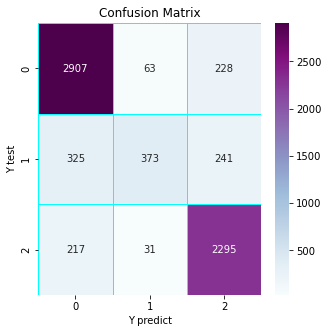

In [119]:
evaluation_metrics(Y_test, Y_pred_test)

In [114]:
# Define the parameter grid for RandomForest
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt']
}


# Helper function to create a RandomForestClassifier with given params
def create_rf_classifier(params):
    return RandomForestClassifier(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        max_features=params['max_features'],
        random_state=42
    )

# Convert the dictionaries of parameters into a list of all combinations
all_params = list(product(*param_grid.values()))

best_f1 = 0
best_rf_params = None

# Loop through each combination of hyperparameters
for params in tqdm(all_params, desc="Grid Search"):
    params_dict = dict(zip(param_grid.keys(), params))
    clf = create_rf_classifier(params_dict)
    
    # Train and evaluate the model
    clf.fit(X_train_tfidf, Y_train)
    predictions = clf.predict(X_test_tfidf)
    f1 = f1_score(Y_test, predictions, average='weighted')
    # Update the best F1 score and parameters if current model is better
    if f1 > best_f1:
        best_f1 = f1
        best_rf_params = params_dict

print("Best F1 Score:", best_f1)
print("Best RandomForest Parameters:", best_rf_params)

Grid Search: 100%|██████████| 288/288 [58:19<00:00, 12.15s/it]   

Best F1 Score: 0.8236980393876961
Best RandomForest Parameters: {'n_estimators': 200, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'max_features': 'auto'}


In [115]:
rf_params = {
    'n_estimators': 200,
    'max_depth': None,
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'max_features': 'auto',
    'random_state': 42
}

# Create a Random Forest Classifier with the provided parameters
clf = RandomForestClassifier(**rf_params)

# Fit the classifier
clf.fit(X_train_tfidf, Y_train)
y_pred = clf.predict(X_test_tfidf)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      3198
           1       0.81      0.40      0.53       939
           2       0.83      0.90      0.87      2543

    accuracy                           0.84      6680
   macro avg       0.83      0.74      0.76      6680
weighted avg       0.83      0.84      0.82      6680

F1 Score:  0.8236980393876961


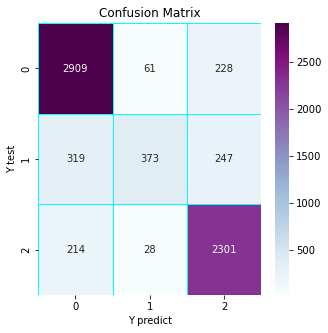

In [116]:
evaluation_metrics(Y_test, y_pred)

# Result and Comparision

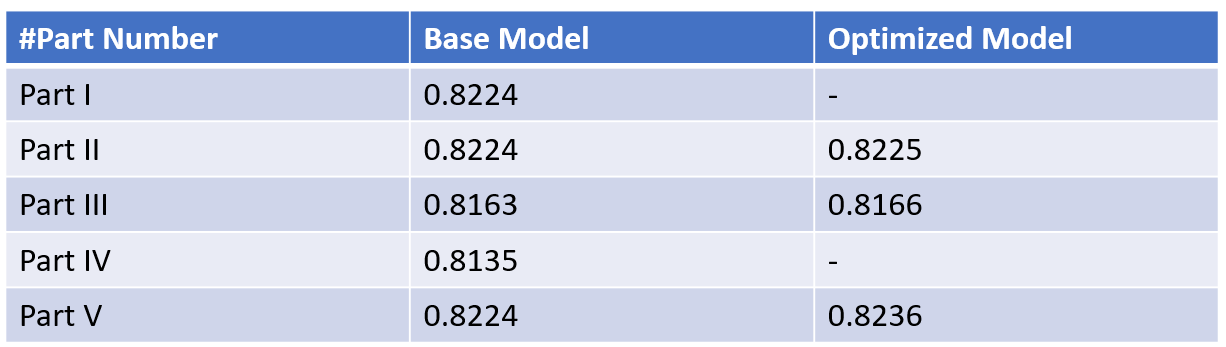

**In this Jupyter notebook, we evaluated three different machine learning models and selected RandomForest based on its accuracy performance for our dataset. Additionally, we experimented with three distinct TF-IDF techniques: word, char, and a combined word-char method. After determining the best TF-IDF approach, we proceeded to optimize both the TF-IDF model and the RandomForest algorithm. Our final best F1 score achieved was 0.8236, which we consider to be a moderate performance.**